# Example 4 - One vs All Logistic Regression

**NOTE: The example and sample data is being taken from the "Machine Learning course by Andrew Ng" in Coursera.**

In [2]:
# initial imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# imports from my models
from models.data_preprocessing import add_bias_unit
from models.logistic_regression import cost_function, predict, gradient_descent, gradient_function, sigmoid

In [4]:
# loading dataset
import scipy.io as sio  # sio for loading matlab file .mat
data = sio.loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']

Setting up initial variables we will be needing for the script.

In [5]:
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                         # (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset.

We will be working with a dataset that contains handwritten digits.

In [6]:
print('Loading and Visualizing Data ...')

m = X.shape[0]

print("Randomly selecting 100 data points to display")
rand_indices = np.random.choice(range(0,m), 100)
rand_samples = X[rand_indices, :]

Loading and Visualizing Data ...
Randomly selecting 100 data points to display


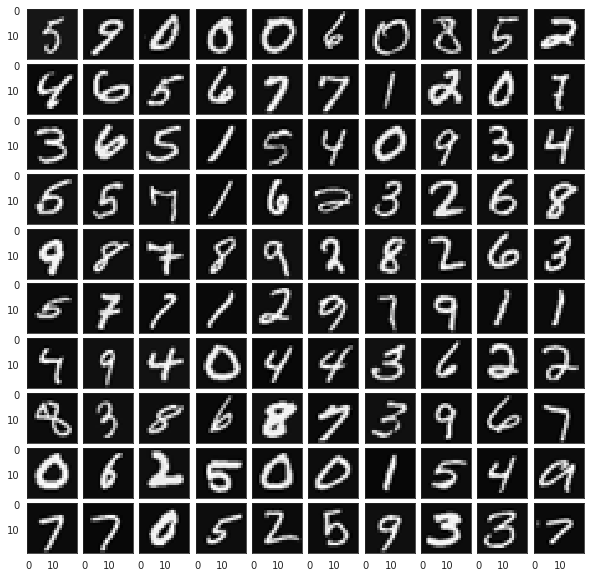

In [7]:
# displaying the 100 random samples using matplotlib
sns.set_style('white')
fig, axis = plt.subplots(10,10,sharex=True, sharey=True, figsize=(10,10))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
axis_flt = axis.flatten()
for i in range(100):
    axis_flt[i].imshow(rand_samples[i, :].reshape([20,20]).T, cmap='gray')

## ============ Part 2a: Vectorize Logistic Regression ============
In this part of the exercise, We will reuse our logistic regression  
code from the last exercise. Our task here is to make sure that our  
regularized logistic regression implementation is vectorized. After  
that, we will implement one-vs-all classification for the handwritten  
digit dataset.

#### Test case for CostFunction

In [8]:
print('\nTesting logistic regression CostFunction() with regularization')
theta_t = np.array([-2, -1, 1, 2]).reshape(4,1)

X_t = np.hstack([np.ones([5,1]), np.arange(1,16).reshape(5,3, order='F')/10.0])
y_t = (np.array([1,0,1,0,1]) >= 0.5).astype(np.int64).reshape(5,1)
lambda_t = 3

J = cost_function(theta_t, X_t, y_t, lambda_t, regularized=True)
grad = gradient_function(theta_t, X_t, y_t, lambda_t, regularized=True)

print('\nCost: {}\n'.format(J))
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing logistic regression CostFunction() with regularization

Cost: [[2.5348194]]

Expected cost: 2.534819

Gradients:

[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



## ============ Part 2b: One-vs-All Training ============

Here we are going to Train num_labels logistic regression classifiers and return
each of these classifiers in a matrix all_theta, where the i-th
row of all_theta corresponds to the classifier for label i.

In [15]:
print('Training One-vs-All Logistic Regression...')

lamda = 0.1
X_bias = add_bias_unit(X)
n=X_bias.shape[1]

# mapping zeros in 'y' back to 0 instead of 10
y[y==10] = 0

from scipy.optimize import minimize

op_list = []

for i in np.arange(num_labels):
    initial_theta = np.zeros(n)
    op_list.append(minimize(fun=cost_function, x0=initial_theta, jac=gradient_function, args=(X_bias, (y==i), lamda, True), method='CG'))

Training One-vs-All Logistic Regression...


## ================ Part 3: Predict for One-Vs-All ================

In [16]:
all_theta = np.ones([n, num_labels])  # to store the values of all the individual thetas into one

for i, op in enumerate(op_list):
    all_theta[:,i] = op.x

In [17]:
temp = sigmoid(X_bias@all_theta) # predictions on each example with each classifier
p = temp.argmax(axis=1).reshape(m,1)  # selecting the number(index) for which classifier is most confident

In [21]:
print("The Accuracy of our classifier is: {:.2f}%".format((p==y).mean()*100))


The Accuracy of our classifier is: 96.46%
